# Aquifer Storage and Recovery with MODFLOW6
David Haasnoot, Justin van Beek

In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 3) # set default figure size
import flopy as fp  # import flopy and call it fp
import glob
import imageio
import IPython

# Calculate the max/min inejction volumes

In [3]:
Q_d = 40_000
Q_tot = Q_d * 1.25 ## Change this later as we actually want to produce this, currentlty we still have 80% loss
d_extrating = 62
d_injecting = 365 - d_extrating ## change later for days with water excess
print(f'Need to pump {Q_tot/d_extrating:.2f}m^3/d to full fill demand') 

Need to pump 806.45m^3/d to full fill demand


In [4]:
Q_tot

50000.0

The maximum infiltration rate is 325.87 [m^3/d]


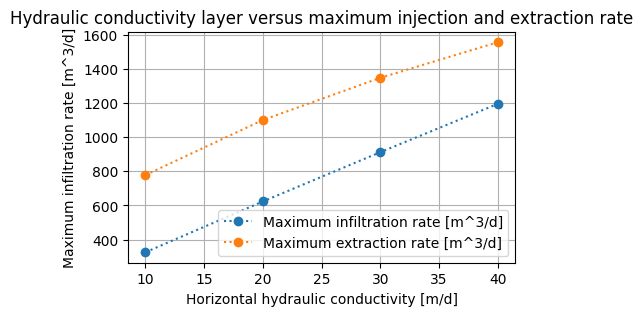

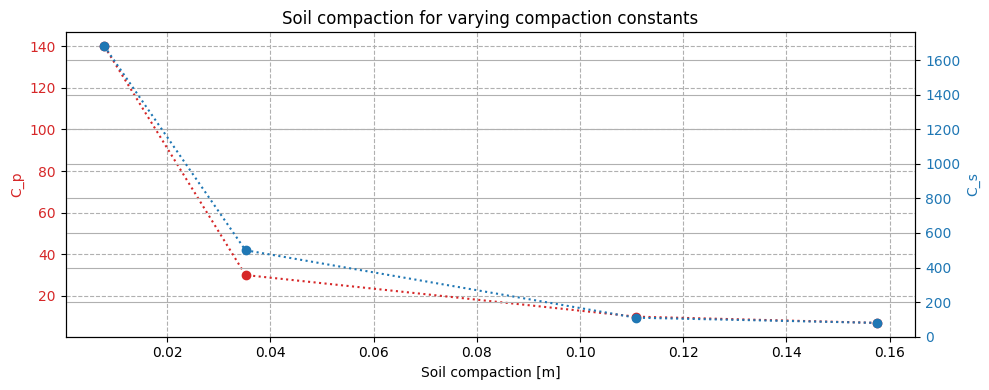

In [12]:
# Calculation maximum infiltration and extraction rate

h_d = 10                                   # Depth of the top of the aquifer beneath surface level. For configuration: 10 m clay, 20 m sand, 10 m clay.
deltah = 0.2 * h_d                         # Deltah is de maximum head in the well above surface level [m]
r_well = 0.2                               # [m] 
k_try = np.arange(10,50,10)                # Hydraulic conductivity sand layer[m/d]
c = 1000                                   # Hydraulic resistance clay layer [d]
D_aquifer = 20                             # Thickness of the aquifer [m]

Q_max_in = (2*np.pi*k_try*D_aquifer*deltah)/np.log(np.sqrt(k_try*D_aquifer*c)/r_well)
q_max_ext = np.sqrt(k_try/(60*60*24))/30                                              # Maximum allowed specific discharge on the borehole in [m/s]
Q_max_ext = q_max_ext * 2 * D_aquifer*np.pi*r_well * (60*60*24)                       # Maximum allowed extraction rate [m^3/d]


print(f'The maximum infiltration rate is {Q_max_in[0]:.2f} [m^3/d]')
#print(f'The maximum extractionn rate is {Q_max_ext:.2f} [m^3/d]')

plt.figure()
plt.title('Hydraulic conductivity layer versus maximum injection and extraction rate')
plt.xlabel('Horizontal hydraulic conductivity [m/d]')
plt.ylabel('Maximum infiltration rate [m^3/d]')
plt.plot(k_try,Q_max_in, linestyle=':', marker='o', label='Maximum infiltration rate [m^3/d]')
plt.plot(k_try,Q_max_ext, linestyle=':', marker='o', label ='Maximum extraction rate [m^3/d]')
plt.grid()
plt.legend()
plt.savefig(r'figures/Hydraulic conductivity layer versus maximum injection and extraction rate.png',bbox_inches="tight")

# Calculation maximum soil compaction

D_c = 10                               # Thickness confining layer [m]
C_p = [7,10,30,140]                    # Primary compaction constant [-]
C_s = [80,110,500,1680]                # Secular compaction constant [-]
t_extr = 62                            # Extraction time [days]
phi =h_d *10                           # Pore pressure [kN/m^2]
d_phi = deltah * 10                    # Change of pore pressure [kN/m^2]
Z=np.zeros(4)

for i in range (len(C_p)):
                Z[i] = D_c * (1/C_p[i] + np.log10(t_extr)/C_s[i])*np.log((phi+0.5*d_phi)/phi) 
                
                
#Z = D_c * (1/C_p + np.log10(t_extr)/C_s)*np.log((phi+0.5*d_phi)/phi)

fig, ax1 = plt.subplots(figsize=(10,4))
plt.title('Soil compaction for varying compaction constants')
plt.grid(linestyle='--')
color = 'tab:red'
ax1.set_xlabel('Soil compaction [m]')
ax1.set_ylabel('C_p', color=color)
ax1.plot(Z, C_p, linestyle=':', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

plt.grid()
color = 'tab:blue'
ax2.set_ylabel('C_s', color=color)  # we already handled the x-label with ax1
ax2.plot(Z, C_s, linestyle=':', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig(r'figures/Soil compaction for varying compaction constants.png',bbox_inches="tight")
plt.show()


#print(f'Koppejan drawdown is {Z:.2f} [m]')


In [6]:
Q_limits = np.stack([np.array(Q_max_in),np.stack(Q_max_ext)])

In [7]:
np.savetxt(f'output/Q_limits.txt',Q_limits)

# repeat for rw-0.3

In [39]:
import matplotlib

In [65]:
cmap = matplotlib.cm.tab10

The maximum infiltration rate is 647.11 [m^3/d]


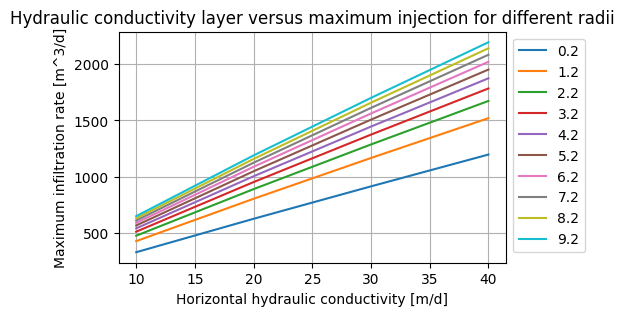

In [68]:
# Calculation maximum infiltration and extraction rate
plt.figure()
h_d = 10                                   # Depth of the top of the aquifer beneath surface level. For configuration: 10 m clay, 20 m sand, 10 m clay.
deltah = 0.2 * h_d                         # Deltah is de maximum head in the well above surface level [m]
                         # [m] 
k_try = np.arange(10,50,10)                # Hydraulic conductivity sand layer[m/d]
c = 1000                                   # Hydraulic resistance clay layer [d]
D_aquifer = 20                             # Thickness of the aquifer [m]
for index, r_well in enumerate(np.arange(0.2,10,1)):
    Q_max_in = (2*np.pi*k_try*D_aquifer*deltah)/np.log(np.sqrt(k_try*D_aquifer*c)/r_well)
    # q_max_ext = np.sqrt(k_try/(60*60*24))/30                                              # Maximum allowed specific discharge on the borehole in [m/s]
    # Q_max_ext = q_max_ext * 2 * D_aquifer*np.pi*r_well * (60*60*24)                       # Maximum allowed extraction rate [m^3/d]
    plt.plot(k_try,Q_max_in, label=f'{r_well}',color=cmap((index)))

print(f'The maximum infiltration rate is {Q_max_in[0]:.2f} [m^3/d]')


plt.title(f'Hydraulic conductivity layer versus maximum injection for different radii')
plt.xlabel('Horizontal hydraulic conductivity [m/d]')
plt.ylabel('Maximum infiltration rate [m^3/d]')

# plt.plot(k_try,Q_max_ext, linestyle=':', marker='o', label ='Maximum extraction rate [m^3/d]')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(rf'figures/Hydraulic conductivity layer versus maximum injection and extraction rate_diff_rs.png',bbox_inches="tight")
